In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sn

In [ ]:
col_names = ["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age","label"]
df = pd.read_csv("diabetes.csv", header=None, names=col_names)
df = df.drop(index=0).reset_index(drop=True)
# convert all feature columns to numeric
df[col_names[:-1]] = df[col_names[:-1]].apply(pd.to_numeric)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age"]
X = df[feature_cols]
y = df["label"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
model = SVC(kernel='rbf',random_state=0)
model.fit(x_train,y_train)
svc_prediction = model.predict(x_test)
print('svc_prediction:',svc_prediction)

svc_prediction: ['0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0' '0' '1'
 '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '0' '0' '1' '0' '1' '0'
 '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0'
 '0' '1' '1' '0' '0' '1' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0'
 '1' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '1'
 '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '1' '0' '0' '1' '1' '1' '0' '1' '1' '0' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '1' '0'
 '0' '1' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1']


In [ ]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl rbf]')
print('Confusion Matrix \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score:', Accuracy_score)
print('Accuracy in Percentage', int(Accuracy_score*100), '%')
print(classification_report(svc_prediction,y_test))

SVC [ kernerl rbf]
Confusion Matrix 
 [[133  27]
 [ 24  47]]
Accuracy Score: 0.7792207792207793
Accuracy in Percentage 77 %
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.66      0.64      0.65        74

    accuracy                           0.78       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.78      0.78      0.78       231



[Text(0.5, 1.0, 'SVC [rbf]')]

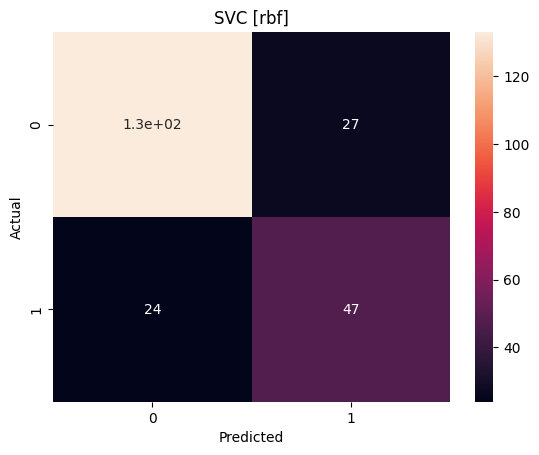

In [ ]:
conf_mat=pd.crosstab(y_test,svc_prediction, rownames=['Actual'],
colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [rbf]')

In [ ]:
model = SVC(kernel='linear',random_state=0)
model.fit(x_train,y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction:',svc_prediction)

svc_prediction: ['0' '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1'
 '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '1' '0' '0' '1' '1' '0' '1' '0'
 '0' '1' '1' '0' '0' '1' '1' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0'
 '1' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '1'
 '0' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '1' '0'
 '0' '1' '0' '1' '1' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1']


In [ ]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl -linear ]')
print('Confusion Matrix: \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score', Accuracy_score)
print('Accuracy in Percentage', int (Accuracy_score*100), '%')
print(classification_report(svc_prediction,y_test))

SVC [ kernerl -linear ]
Confusion Matrix: 
 [[132  28]
 [ 22  49]]
Accuracy Score 0.7835497835497836
Accuracy in Percentage 78 %
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       154
           1       0.69      0.64      0.66        77

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



[Text(0.5, 1.0, 'SVC [linear]')]

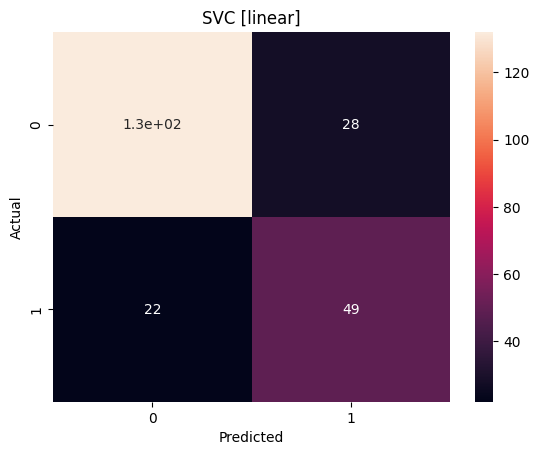

In [ ]:
conf_mat=pd.crosstab(y_test,svc_prediction, rownames=['Actual'],
colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [linear]')